In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
student_mat = pd.read_csv('~/Downloads/student/student-mat.csv', delimiter = ';')

In [3]:
print(student_mat)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
5       GP   M   16       U     LE3       T     4     3  services     other   
6       GP   M   16       U     LE3       T     2     2     other     other   
7       GP   F   17       U     GT3       A     4     4     other   teacher   
8       GP   M   15       U     LE3       A     3     2  services     other   
9       GP   M   15       U     GT3       T     3     4     other     other   
10      GP   F   15       U     GT3       T     4     4   teacher    health   
11      GP   F   15       U     GT3       T     2   

In [4]:
print("Shape of student_mat: {}".format(student_mat.shape))

Shape of student_mat: (395, 33)


In [5]:
# X = student_mat.drop(['G3', 'school', 'guardian'], axis=1)
X = student_mat.loc[:, ['G2', 'absences', 'G1']]
# X = student_mat.loc[:, ['G2', 'goout', 'absences', 'G1']]
y = student_mat['G3']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

* 1%台：`sex`、`Fedu`、`Fjob`、`paid`、`nursery`、`internet`、`famrel`、`Dalc`、`health`

* 2%台：`age`、`famsize`、`studytime`、`failures`

* 3~4%：`Medu`、`Mjob`、`reason`、`freetime`

* 5~10%：`goout`、`absences`、`G1`

* それ以上：`G2`

In [7]:
# 決定木
tree = DecisionTreeClassifier(random_state=0, max_depth=2)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.351
Accuracy on test set: 0.354


In [8]:
# 最小二乗法
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(lr.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(lr.score(X_test, y_test)))

Accuracy on training set: 0.845
Accuracy on test set: 0.783


/Users/MacUser/anaconda2/envs/tf140/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


Text(0, 0.5, 'G3')

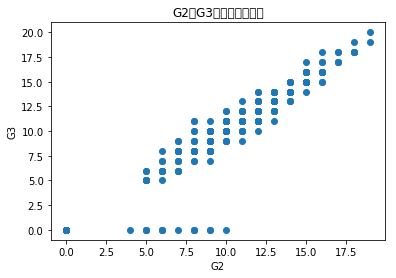

In [9]:
plt.plot(X_train['G2'], y_train, 'o')
plt.title("G2とG3の折れ線グラフ")
plt.xlabel("G2")
plt.ylabel("G3")

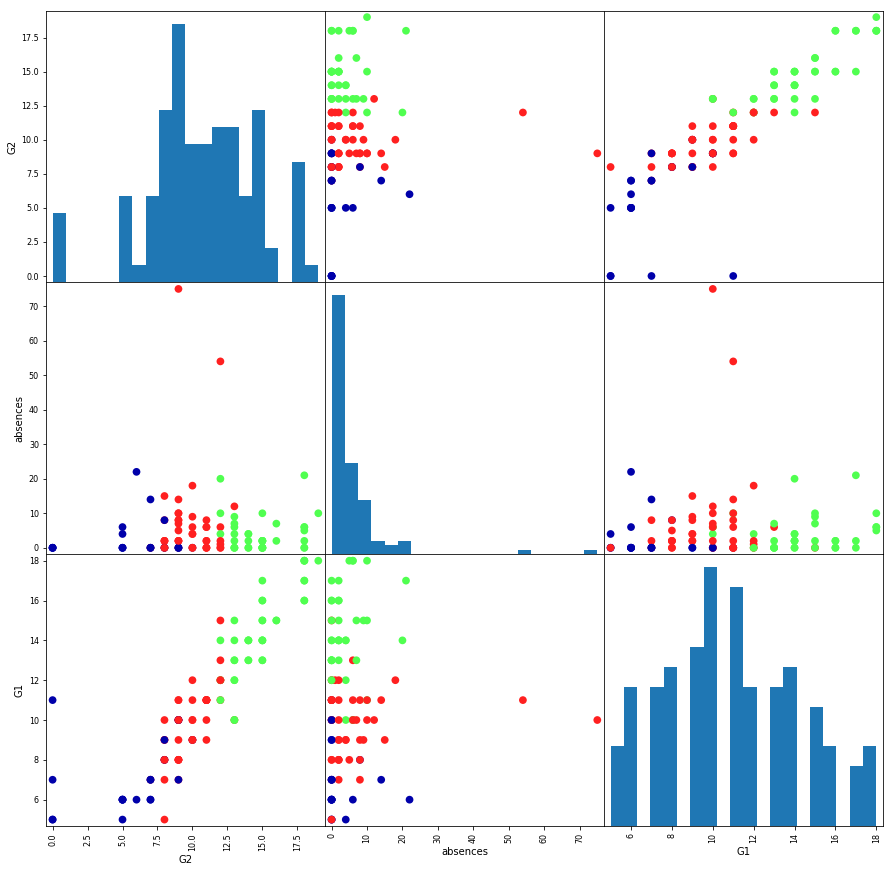

In [10]:
import mglearn

grr = pd.plotting.scatter_matrix(X_test, 
                                          c=y_test, 
                                          figsize=(15, 15), 
                                          marker='o',
                                          hist_kwds={'bins': 20},
                                          s=60,
                                          alpha=8,
                                          cmap=mglearn.cm3)

In [11]:
# import matplotlib.font_manager
# print(matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf'))

In [12]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'AppleGothic'

Text(0, 0.5, 'G3')

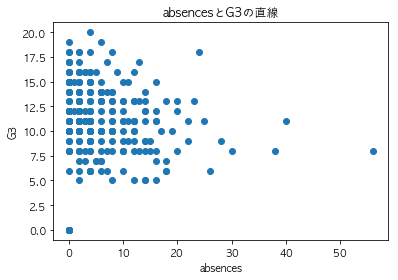

In [13]:
plt.plot(X_train['absences'], y_train, 'o')
plt.title("absencesとG3の直線")
plt.xlabel("absences")
plt.ylabel("G3")

In [14]:
x = np.linspace(1, len(X), len(X))

print(lr.coef_)
print(lr.intercept_)
# fh = a * x + b
# plt.plot(x, fh, label="fh")
# plt.plot(X_train['G2'], y_train, 'o')

[1.00870758 0.03726999 0.09721403]
-1.5205544885009683


\begin{eqnarray}
\hat{y} =
\begin{pmatrix}
x_{G2}\\
x_{absences}\\
x_{G1}
\end{pmatrix}
\end{eqnarray}

Text(0, 0.5, 'G3 [grade]')

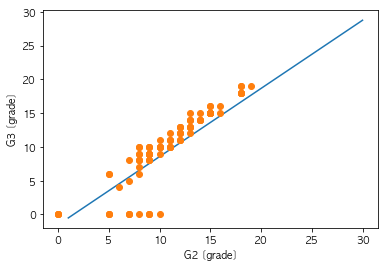

In [15]:
# G2の最小二乗法のグラフ
x = np.linspace(1, 30, 30)
b = lr.intercept_
a = lr.coef_[0]
fh = a * x + b
plt.plot(x, fh, label="fh")
plt.plot(X_test['G2'], y_test, 'o')
plt.xlabel("G2 [grade]")
plt.ylabel("G3 [grade]")

Text(0, 0.5, 'G3 [grade]')

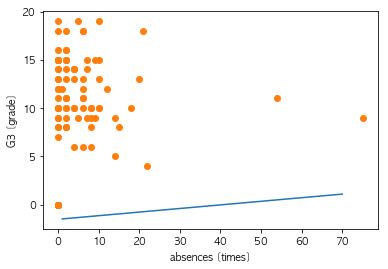

In [16]:
# absencesの最小二乗法のグラフ
x = np.linspace(1, 70, 30)
b = lr.intercept_
a = lr.coef_[1]
fh = a * x + b
plt.plot(x, fh, label="fh")
plt.plot(X_test['absences'], y_test, 'o')
plt.xlabel("absences [times]")
plt.ylabel("G3 [grade]")

Text(0, 0.5, 'G3 [grade]')

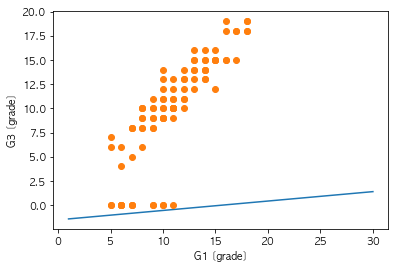

In [17]:
# G1の最小二乗法のグラフ
x = np.linspace(1, 30, 30)
b = lr.intercept_
a = lr.coef_[2]
fh = a * x + b
plt.plot(x, fh, label="fh")
plt.plot(X_test['G1'], y_test, 'o')
plt.xlabel("G1 [grade]")
plt.ylabel("G3 [grade]")

In [18]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
#可視化
dot_data = StringIO()
export_graphviz(tree,out_file=dot_data,
                    feature_names=X_train.columns,
                    filled=True,
                    rounded=True,
                    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("tree_short.pdf")

True

In [19]:
# import numpy as np
# # 2番目の特徴量の2乗を追加
# X_new = np.hstack([X, X[:, 1:] ** 2])

# from mpl_toolkits.mplot3d import Axes3D, axes3d
# figure = plt.figure()

# # 3Dで可視化
# ax = Axes3D(figure, elev=-152, azim=26)

# # y == 0の点をプロットしてからy == 1の点をプロット
# mask = y == 0
# ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
# ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)
# ax.set_xlabel("feature0")
# ax.set_ylabel("feature1")
# ax.set_zlabel("feature1 ** 2")

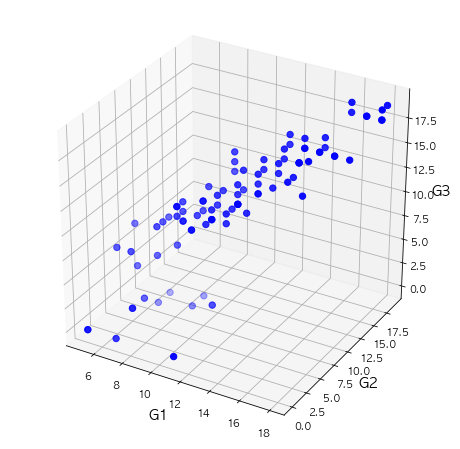

In [20]:
# 3次元散布図
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Figureを追加
fig = plt.figure(figsize = (8, 8))

# 3DAxesを追加
ax = fig.add_subplot(111, projection='3d')

# Axesのタイトルを設定
ax.set_title("", size = 20)

# 軸ラベルを設定
ax.set_xlabel("G1", size = 14, color = "black")
ax.set_ylabel("G2", size = 14, color = "black")
ax.set_zlabel("G3", size = 14, color = "black")

# -5～5の乱数配列(100要素)
x = X_test['G1']
y = X_test['G2']
z = y_test

# 参考
# Y,Z = np.meshgrid(y,z)
# X = np.array([x]*Y.shape[0])
# ax.plot_surface(X,Y,Z,alpha=0.3)

# 曲線を描画
ax.scatter(x, y, z, s = 40, c = "blue")